In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from itertools import chain
%matplotlib inline

In [3]:
df = pd.read_pickle('../prd_review/df_dataset_v2.pkl')
# df = df.drop(['term_vectors'], axis=1).reset_index(drop=True)
len(df)

775741

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775741 entries, 0 to 775740
Data columns (total 5 columns):
best_flag       22763 non-null object
m_id            775741 non-null object
score           775741 non-null int64
text            775741 non-null object
term_vectors    775741 non-null object
dtypes: int64(1), object(4)
memory usage: 29.6+ MB


In [5]:
df = df.dropna(subset=['term_vectors']).reset_index(drop=True)

KeyError: ['sorted_terms']

In [7]:
df['len_terms'] = df.term_vectors.apply(lambda term_vector: len(term_vector))

In [8]:
df.head()

,best_flag,m_id,score,text,term_vectors,len_terms
0,None,134575613,80,비니스타일 이에요 귀마게가 없어도 되는 모자고 겨울라운딩용으로 잘샀네요,"[비니, 스타일, 귀, 마게, 없, 되, 모자, 겨울, 라운, 딩, 잘, 사]",12
1,C,134575597,100,요즘 소이현씨 패딩이 인기라고 해서 구매했는데요 정말 너무 이뻐요 실제로 받아보니까...,"[요즘, 소이현, 씨, 패딩, 인기, 하, 구매, 정말, 너무, 이쁘, 실제로, 받...",47
2,C,134575605,100,기타등등 김종배 오늘 보험 가입해야 하나 하나 더 많은 것 같습니다 아 근데 나 진...,"[기타, 등등, 김종배, 오늘, 보험, 가입, 하나, 하나, 더, 많, 것, 같, ...",29
3,None,134575587,80,좋아요 귀까지 내려오고 머리보온띠가 분리돼서 다른모자에도활용할수 있을꺼같네요,"[좋, 귀, 내려오, 머리, 보온, 띠, 분리, 다른, 모자, 활용, 수, 있, 것...",14
4,None,134575624,100,배송너무빨라 놀랐어요 디자인제품력모두만족합니다,"[배송, 너무, 빠르, 놀라, 디자인, 제품, 력, 모두, 만족]",9


In [7]:
# best prd_review
df_best = df.dropna(subset=['best_flag'])

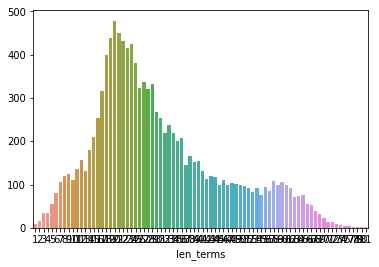

In [8]:
sns.barplot(x=df_best.groupby(by=['len_terms']).size().index, y=df_best.groupby(by=['len_terms']).size())

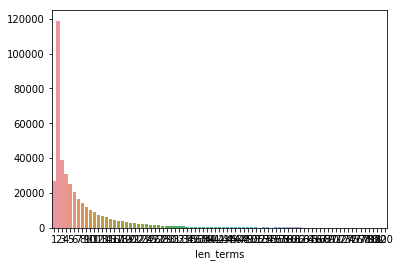

In [9]:
sns.barplot(x=df.groupby(by=['len_terms']).size().index, y=df.groupby(by=['len_terms']).size())

In [10]:
df.len_terms.describe()

count    400292.000000
mean          7.571895
std           9.405514
min           1.000000
25%           2.000000
50%           4.000000
75%           9.000000
max         100.000000
Name: len_terms, dtype: float64

In [9]:
df.len_terms.describe()

count    775741.000000
mean          8.354635
std          10.330506
min           1.000000
25%           2.000000
50%           4.000000
75%          10.000000
max          94.000000
Name: len_terms, dtype: float64

In [37]:
# 1 : len_terms 5 이상 / score 100
df_positive = df.loc[(df.len_terms>5)& (df.score > 99)]
len(df_positive)

257799

In [38]:
df_positive['y'] = 1
df_positive = df_positive[['m_id', 'text', 'term_vectors', 'y']]

/home/admin-/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_positive.sample(20)

,m_id,text,term_vectors,y
277033,135382983,배송빠릅니다 소재 부들부들해서 좋구요 XL인데 조금 작은 느낌입니다,"[배송, 빠르, 소재, 부들부들, 하, 좋, 2, xl, 조금, 작, 느낌]",1
455760,135360074,눈 아프게 고르고 고른 옷이 맘에 들어 다행입니다 진한 색이라 조금 날씬해보일듯하고...,"[눈, 아프, 고르, 고르, 옷, 맘, 듣, 다행, 진하, 색, 조금, 날씨, 보이...",1
359853,134643009,이제까지 쓴 것 중에서 제일 부드럽고 얇고 쫀쫀하게 발려요 다 쓰면 재구매 의사 있...,"[이제, 쓰, 것, 중, 제일, 부드럽, 얇, 쫀쫀, 발리, 다, 쓸, 구매, 의사...",1
116084,135284274,배송 디자인 구성 상품품질까지 하나도 빠짐없이 만족입니다 사실 상품평중에 상품 품질...,"[배송, 디자인, 구성, 상품, 품질, 하나, 빠짐없이, 만족, 사실, 상, 품평,...",1
114866,135272906,가격만족 향도만족 다 좋아요,"[가격, 만족, 향도, 만족, 다, 좋]",1
64944,135093211,구성이 너무 맘에 들어요 엄마가 좋아하시네요 잘 쓸게요 한율은 써봤던 브랜드라 믿고...,"[구성, 너무, 맘, 듣, 엄마, 좋, 않, 잘, 쓰, 한, 율, 쓰, 보, 브랜드...",1
769171,135531298,얇은데 따뜻해요 디자인도 슬림한게 예뻐요,"[얇, 따뜻, 디자인, 슬림, 것, 예쁘]",1
139896,135599692,완전 만족입니다 제일 신경쓰였던 소음은 정말 조용하네요 쓰기도 편리하고 하나 더 구...,"[완전, 만족, 제일, 신경, 쓰이, 소음, 정말, 조용, 쓸, 편리, 하나, 더,...",1
128066,135352928,샆 다니냐고 묻더라구요 이지듀 이용 개월 정도 됐어요 ㅎ,"[샆, 다니, 묻, 듀, 이용, 7, 개월, 정도, 되, ㅎㅎ]",1
469506,134623558,중학생 딸한테 사줬는데 가볍고 잘 맞아요 키 에 kg인데 S사줬어요 보라 M샀다가 ...,"[중학, 생, 딸, 사, 주, 가볍, 잘, 맞, 키, 165, 54, kg, s, ...",1


In [40]:
# 0 : len_terms 5 이상 / score <= 75
df_negative = df.loc[(df.len_terms > 5)  & (df.score <= 75)]
len(df_negative)

24681

In [41]:
df_negative['y'] = 0
df_negative = df_negative[['m_id', 'text', 'term_vectors', 'y']]


,best_flag,m_id,score,text,term_vectors,len_terms
382707,C,134752460,50,주문 일만에 받았는데 에어캡도 없이 배송해 탈취제가 다 깨지고 칫솔에 다 묻었네요 ...,"[주문, 6, 일, 만, 받, 에어, 캡, 없이, 배송, 탈취, 제, 다, 깨지, ...",46
682069,None,134999004,70,착한가격이구 생각보다 괜찮아요 후기보고 신축성이없다해서 크게 주문했더니 좀 많이 큽...,"[착하, 가격, 생각, 괜찮, 후기, 신축, 없, 하, 크, 주문, 좀, 많이, 크...",22
45124,None,134979013,30,못입어요 바랜검정색 반품하고싶어도 택배비땜에 버려야겠어요,"[못, 입, 바래, 검정, 색, 반품, 싶, 택배, 비, 땜, 버리, 하]",12
263972,None,135151178,70,사이즈괜찮으나 블랙임어불구하고 내지가 흰색이다보니 검정색사이로 희끗희끗,"[사이즈, 괜찮, 블랙, 임어, 불구, 내지, 흰, 색, 보, 검정, 색, 사이, ...",13
556475,None,135025098,60,쓰던제품이라 재구매합니다 반품된 상품을 재포장해서 발송한다는것을 처음알았네요 바로 ...,"[쓸, 제품, 구매, 반품, 상품, 포장, 발송, 것, 처음, 알, 바로, 맞, 교...",57
356463,None,134625414,75,옷감도 보들거리고 좋은데 실밥처리가 그러네여,"[옷, 감, 보들, 좋, 실, 밥, 처리, 그러]",8
444178,None,135423438,55,가격만큼 큰기대는 하지마시고 박스티입니다 안감기모땜에 정전기 생각하고입으세요,"[가격, 크, 기대, 하, 마시, 박스, 티, 안, 감, 기모, 땜, 정, 전기, ...",15
359420,None,134647746,50,잘못 산거같아요 가격이 싸서 그냥 입어요,"[잘못, 살, 것, 같, 가격, 싸, 그냥, 입]",8
180358,None,134722965,65,옷이 작아요 길이도 짧아요 날씬한 사람 아님 중학교 학년 왜소한 사람이 입어야할듯 ...,"[옷, 작, 길이, 짧, 날씨, 사람, 중, 학교, 1, 학년, 왜소, 사람, 입,...",20
352415,C,134599220,70,어제 저녁에 받고 바로 열어보니 보조 휴지통 뚜껑 고정부분이 부러져있습니다 이건 어...,"[어제, 저녁, 받, 바로, 열, 보, 보조, 휴지, 통, 뚜껑, 고정, 부분, 부...",26


In [43]:
df_negative.sample(20)

,m_id,text,term_vectors,y
372233,134709722,이게 뭡니까 가품이죠 나이키가 QC를 저렇게 볼일 없잖아요 인쇄된것도 아니고 고무소...,"[이것, 뭐, 가품, 나이, qc, 저렇게, 볼, 일, 없, 않, 인쇄, 것, 고무...",0
741832,135384587,너무약해서 컵놓을때마다 휘청거려요 달그락달그락 못쓰겠네요,"[너무, 약하, 컵, 놓, 때, 휘청, 달그락달그락, 못, 쓸]",0
552740,135003128,염색모라 항상 건조하고 푸석하게 머리가 날렸는더 제품첫사용에 완죤 반했어요 촉촉하고...,"[염색, 모으, 항상, 건조, 푸석, 머리, 날리, 더, 제품, 첫, 사용, 완, ...",0
99098,134860063,크게 나온편이고 화면보다 이쁘지 않네요,"[크, 나오, 편, 화면, 이쁘, 않]",0
749137,135315401,불량인듯 열이 안 올라옴 반품 교환 할려다가 상담원과 통화하기 귀찮아서 쓰레기통 으...,"[불량, 열, 안, 올라오, 반품, 교환, 하, 상담, 원, 통화, 귀찮, 쓰레기,...",0
129900,135593764,싼맛에 사긴 했는데 역시 품질이 마니 별로네요 따뜻하긴 할것 같아요,"[싸, 맛, 살, 하, 역시, 품질, 마니, 별로, 따뜻, 하, 것, 같]",0
358823,134635023,패드가 보풀이 만이지네요 이불은 촉감이 좋아요,"[패드, 보풀, 만, 이, 지네, 이불, 촉감, 좋]",0
129123,135400251,선물할려고 샀는데 시간은없고 썩 맘에 들지않고 고급스런멋은 없고 그냥 그런대로 입니...,"[선물, 사, 시간, 없, 썩, 맘, 듣, 않, 고급, 멋, 없, 그냥, 그런대로,...",0
70934,135138552,일단 신어 보고 얘기해준다는 ㅎ,"[일단, 신, 보, 얘기, 주, ㅎ]",0
740442,135308182,스크래치 상품이라 교환했는데 교환받은 옷 주머니에 은행 사은품이랑 안경닦는게 들어있...,"[스크래치, 상품, 교환, 교환, 받, 옷, 주머니, 은행, 사은, 품, 안경, 닦...",0


In [45]:
df_dataset = df_positive.append(df_negative)

In [46]:
len(df_dataset)

282480

In [47]:
df_dataset = df_dataset.rename({'term_vectors': 'x'}, axis=1)

In [48]:
df_dataset.head()

,m_id,text,x,y
1,134575597,요즘 소이현씨 패딩이 인기라고 해서 구매했는데요 정말 너무 이뻐요 실제로 받아보니까...,"[요즘, 소이현, 씨, 패딩, 인기, 하, 구매, 정말, 너무, 이쁘, 실제로, 받...",1
2,134575605,기타등등 김종배 오늘 보험 가입해야 하나 하나 더 많은 것 같습니다 아 근데 나 진...,"[기타, 등등, 김종배, 오늘, 보험, 가입, 하나, 하나, 더, 많, 것, 같, ...",1
4,134575624,배송너무빨라 놀랐어요 디자인제품력모두만족합니다,"[배송, 너무, 빠르, 놀라, 디자인, 제품, 력, 모두, 만족]",1
5,134575617,늘쓰던거라믿고또재구매 사은품으로주는화장품들은 향이 제가싫어하는향이라손이잘안가네요,"[늘, 쓸, 것, 믿, 또, 구매, 사은, 품, 줏, 화장, 품, 향, 제, 싫, ...",1
9,134575658,떨어지는 핏이 예뻐요 배에 힘을주어야겠지만 길이도 적당하고 색상도 이쁘고 질도 괜찮네요,"[떨어지, 핏, 예쁘, 배, 힘, 줏, 하, 길이, 적당, 색상, 이쁘, 질, 괜찮]",1


In [22]:
df_dataset.sample(frac=1).reset_index(drop=True).to_pickle('./df_dataset.pkl')

In [49]:
df_dataset.to_pickle('./df_dataset.pkl')

In [27]:
text = df_dataset.x.tolist()

In [28]:
word_count = dict()

for word in chain(*text):
    if not word in word_count.keys():
        word_count[word] = 1
    else:
        word_count[word] += 1

In [29]:
df_word_count = pd.DataFrame(data={'word':list(word_count.keys()), 'cnt':list(word_count.values())})
df_word_count = df_word_count.sort_values(by=['cnt'], ascending=False).reset_index(drop=True)

In [50]:
df_word_count

,word,cnt
0,좋,171361
1,하,94918
2,것,91270
3,잘,74741
4,있,68166
5,보,53887
6,입,48808
7,같,48567
8,너무,43487
9,않,42111


In [30]:
df_word_count.cnt.describe()

count     26055.000000
mean        166.052159
std        1973.561020
min           1.000000
25%           1.000000
50%           3.000000
75%          14.000000
max      171361.000000
Name: cnt, dtype: float64

In [31]:
len(df_word_count.loc[df_word_count.cnt > 10])

7429

In [32]:
df_vocabulary = df_word_count.loc[df_word_count.cnt > 10].reset_index()

In [33]:
df_vocabulary = df_vocabulary.rename({'index':'idx'}, axis=1)[['idx', 'word']]
df_vocabulary['idx'] = df_vocabulary['idx'] + 1

In [34]:
vocabulary_list = list()
vocabulary_dict = dict()

In [35]:
def set_vocab(row):
    vocabulary[row.word] = row.idx
    vocabulary_inv[row.idx] = row.word

vocabulary['UNK'] = 0
vocabulary[0] = 'UNK'

df_vocabulary.apply(lambda row: set_vocab(row), axis=1)

NameError: name 'vocabulary' is not defined

In [25]:
def terms_to_seq(terms_list):
    seq_list = []
    for term in terms_list:
        seq_list.append(vocabulary.get(term, 0))
    return np.array(seq_list)

df_train['seq'] = df_train.sorted_terms.apply(lambda terms_list: terms_to_seq(terms_list))

In [73]:
df_train['x'] = df_train.sorted_terms.apply(lambda x: " ".join(x))


In [31]:
df_train.to_pickle('./df_train_20181203.pkl')

In [27]:
df_train = df_train.sample(frac=1).reset_index()
df_train = df_train.rename({'index': 'idx'}, axis=1)

In [33]:
df_train[['idx', 'text', 'x', 'y']].to_pickle('./df_dataset.pkl')

In [32]:
df_train[['idx', 'text', 'x', 'y']].head()

,idx,text,x,y
0,79604,샴푸도 쓰고있는데 역시 염색약도 좋아요.,"[샴푸, 쓸, 있, 역시, 염색, 약, 좋]",1
1,133769,저렴하게 알찬구매 ㅎㅎ\r\n허나가격에 3뭉치 이게 웬 횡재^^,"[저렴, 알차, 구매, 허나, 가격, 3, 뭉치, 이것, 횡재]",0
2,90265,마데카 좋아요 번들거리는것만 조금 덜하면 좋을듯요,"[데카, 좋, 번들거리, 것, 하, 좋, 듯, 이]",1
3,16246,겨울이라 조금건조했는데 촉촉하니 커버도 되는 같아 좋아요 구성이 넘 맘에 들어...,"[겨울, 이, 건조, 촉촉, 커버, 되, 같, 좋, 구성, 맘, 듣, 촉촉, 겨울,...",1
4,181982,디자인은 예쁜데 바지통은 넓고 허리부분은 좀 불편하고 구김도 있네요.. 그래도 감수...,"[디자인, 예쁘, 바지, 통, 넓, 허리, 부분, 불편, 구김, 있, 그래도, 감수...",1


In [43]:
df_dataset = pd.DataFrame()
df_train['x'] = df_train.sorted_terms.apply(lambda x: " ".join(x))
df_dataset['y'] = df_train.y
df_dataset[['x','y']].to_pickle('./df_dataset.pkl')

In [36]:
df_dataset['x_len'] = df_dataset.x.apply(lambda t: len(t))

In [51]:
df_dataset.loc[df_dataset.y == 0]

,x,y,x_len
16,빨간 색 줄 무늬 염색 때 번지 부분 있 입 전 세탁 보 물 빠지 하지만 디자인 귀...,0,51
20,상 품평 보 주문 걍 그리고 세우 지 않 불편,0,25
91,달 쓰 보 냄새 독하 하 세탁 보 ㅡ면좀나을듯,0,25
109,배송 엄 청 늦 기장 160 cm 무릎 오 가슴 사이즈 106 cm 이 하 단추 풀...,0,160
212,좋 블랙 어쩌 수 없 것 이 세무 재질 퍼지 제품 자체 실 밥 나오 있 실망 터지 ...,0,105
217,여기 사고 예쁘 주문 실망 이 귀 침 휘 오 마개 고장나 것 어이없 장사 식 하 말,0,46
242,좋 근데 몸 크 딸 주려 이 뿌요,0,18
289,싸 ㅠㅠ 바느 질 맘 상하 길 거리 살 것 차이 없 지에스 믿 사 데 ㅠ 실망,0,43
296,나 인생 인터넷 쇼핑 최악 쇼핑 ㅠㅠ처음 상품 오 않 포장 박스 찢어지 않 외 박스...,0,116
328,살 사이즈 크 입 하 허리 배 딩 이 보 사이즈 주문 그런데 허리 넉넉 편하 것 같...,0,106


In [36]:
df

,best_flag,m_id,score,text,term_vectors,len_terms
0,None,134575613,80,비니스타일 이에요 귀마게가 없어도 되는 모자고 겨울라운딩용으로 잘샀네요,"[비니, 스타일, 귀, 마게, 없, 되, 모자, 겨울, 라운, 딩, 잘, 사]",12
1,C,134575597,100,요즘 소이현씨 패딩이 인기라고 해서 구매했는데요 정말 너무 이뻐요 실제로 받아보니까...,"[요즘, 소이현, 씨, 패딩, 인기, 하, 구매, 정말, 너무, 이쁘, 실제로, 받...",47
2,C,134575605,100,기타등등 김종배 오늘 보험 가입해야 하나 하나 더 많은 것 같습니다 아 근데 나 진...,"[기타, 등등, 김종배, 오늘, 보험, 가입, 하나, 하나, 더, 많, 것, 같, ...",29
3,None,134575587,80,좋아요 귀까지 내려오고 머리보온띠가 분리돼서 다른모자에도활용할수 있을꺼같네요,"[좋, 귀, 내려오, 머리, 보온, 띠, 분리, 다른, 모자, 활용, 수, 있, 것...",14
4,None,134575624,100,배송너무빨라 놀랐어요 디자인제품력모두만족합니다,"[배송, 너무, 빠르, 놀라, 디자인, 제품, 력, 모두, 만족]",9
5,None,134575617,100,늘쓰던거라믿고또재구매 사은품으로주는화장품들은 향이 제가싫어하는향이라손이잘안가네요,"[늘, 쓸, 것, 믿, 또, 구매, 사은, 품, 줏, 화장, 품, 향, 제, 싫, ...",20
6,None,134575575,100,괜찮네요,[괜찮],1
7,None,134575635,100,상품평가,"[상품, 평가]",2
8,None,134575610,100,상품평가,"[상품, 평가]",2
9,None,134575658,100,떨어지는 핏이 예뻐요 배에 힘을주어야겠지만 길이도 적당하고 색상도 이쁘고 질도 괜찮네요,"[떨어지, 핏, 예쁘, 배, 힘, 줏, 하, 길이, 적당, 색상, 이쁘, 질, 괜찮]",13
